<a href="https://colab.research.google.com/github/xuanthang482/CS114.K21/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import files
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

ImportError: ignored

In [0]:
# Load dataset
dataset = pd.read_csv('https://cs.uit.edu.vn/data.txt',names= ['size','time'])

In [6]:
dataset.head(30)

,size,time
0,4032139,1.200580
1,2055486,0.509774
2,5626651,1.476080
3,42065,0.007651
4,6297788,1.661560
5,8871407,2.653120
6,3106899,0.801168
7,2410855,0.598170
8,558704,0.129056
9,9012730,2.477870


In [7]:
print(dataset.shape)

(5211, 2)


In [8]:
dataset['size2'] = dataset['size']*dataset['size']
dataset['sizeLogsize'] = dataset['size']*np.log10(dataset['size'])
dataset


,size,time,size2,sizeLogsize
0,4032139,1.200580,16258144915321,2.663444e+07
1,2055486,0.509774,4225022696196,1.297611e+07
2,5626651,1.476080,31659201475801,3.798130e+07
3,42065,0.007651,1769464225,1.945052e+05
4,6297788,1.661560,39662133692944,4.281984e+07
...,...,...,...,...
5206,6600098,1.804520,43561293609604,4.500970e+07
5207,5339132,1.450310,28506330513424,3.591885e+07
5208,4794647,1.293070,22988639854609,3.203187e+07
5209,4440131,1.196530,19714763297161,2.951531e+07


In [0]:
dataset = pd.DataFrame(dataset, columns=['size2', 'sizeLogsize', 'size', 'time'])

In [11]:
dataset.head(10)

,size2,sizeLogsize,size,time
0,16258144915321,2.663444e+07,4032139,1.200580
1,4225022696196,1.297611e+07,2055486,0.509774
2,31659201475801,3.798130e+07,5626651,1.476080
3,1769464225,1.945052e+05,42065,0.007651
4,39662133692944,4.281984e+07,6297788,1.661560
5,78701862159649,6.163847e+07,8871407,2.653120
6,9652821396201,2.017100e+07,3106899,0.801168
7,5812221831025,1.538649e+07,2410855,0.598170
8,312150159616,3.210973e+06,558704,0.129056
9,81229302052900,6.268224e+07,9012730,2.477870


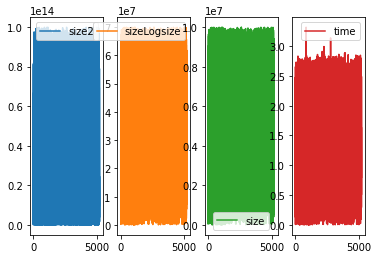

In [12]:
# box and whisker plots
dataset.plot( subplots=True, layout=(1,4), sharex=False, sharey=False)
pyplot.show()

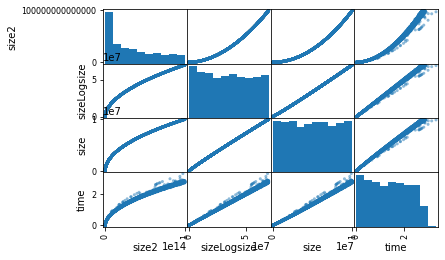

In [13]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm  import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20 , random_state=1)

In [0]:
models = []
models.append(('LR', LinearRegression()))
models.append(('DTreeR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RForestR', RandomForestRegressor()))
models.append(('KNR', KNeighborsRegressor()))

In [0]:
r = {}
for name, model in models:
  model.fit(X_train, Y_train)
  pred = model.predict(X_validation)
  mae = mean_absolute_error(Y_validation, pred)
  r[name]= mae

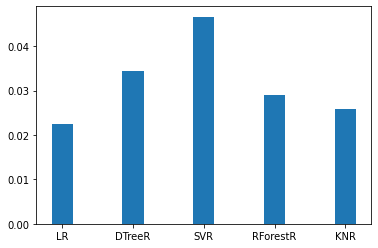

In [34]:
pyplot.bar(r.keys(), r.values(), width=0.3)
pyplot.show()